# Today you are a Machine Learning Engineer in the Department of Marketing and Inventory @ Walmart Labs.
This work relies on processed data from Kaggle https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

This work is motivated by the publication https://arxiv.org/pdf/2010.02503.pdf

*You have access to the Walmart server data, specifically the Electronics section, such that you have NO customer facing information, but you do have access to timestamped data regarding product viewing/carting/purchasing. We will use this data to build a model of whether a not some product will be purchased.*

### If running this notebook in Google Colab, run the following cell first to mount your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

## Task 1: Read in the data

You should have four files:

* `some_column_descriptions.png`
* `user_journey_descriptions.png`
* `X_train.csv`
* `X_test.csv`

We'll start by looking at the descriptions before loading in the csv files.

1. Use the `IPython.display` module to view the `some_column_descriptions.png` file.

    Look through the column names and descriptions to get an idea of what the data is.

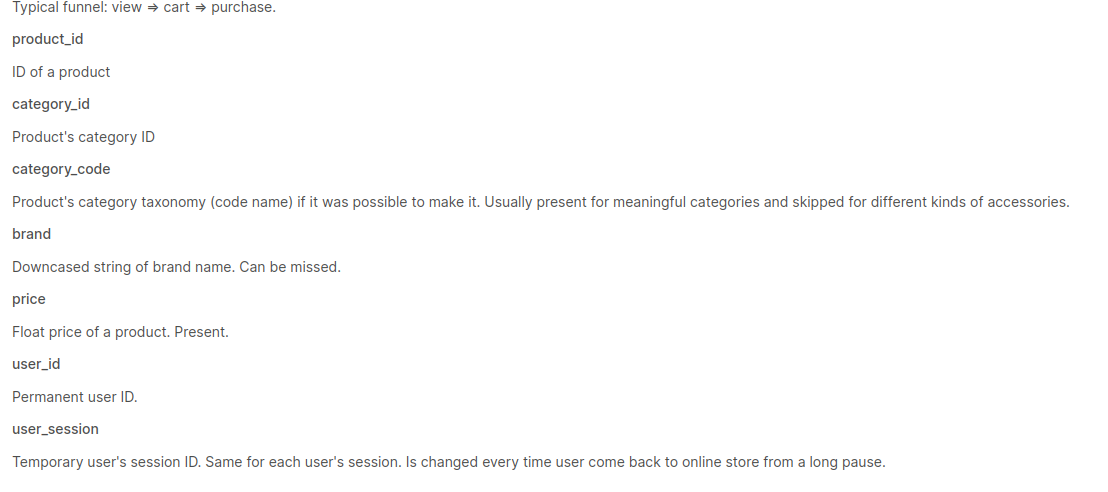

In [ ]:
from IPython.display import Image, display
# change the filename to wherever you downloaded/uploaded the file
filename = '/content/drive/My Drive/FourthBrain/Assignments/Week_2/image1.png'
display(Image(filename=filename))

The dataset has User-journey data, i.e. it tracks information user/product pairs over time to see if the combination results in a purchase.

2. Look at the `user_journey_descriptions.png` file.

    Review the data sample to get a sense of what information we are tracking for each user/product pair.

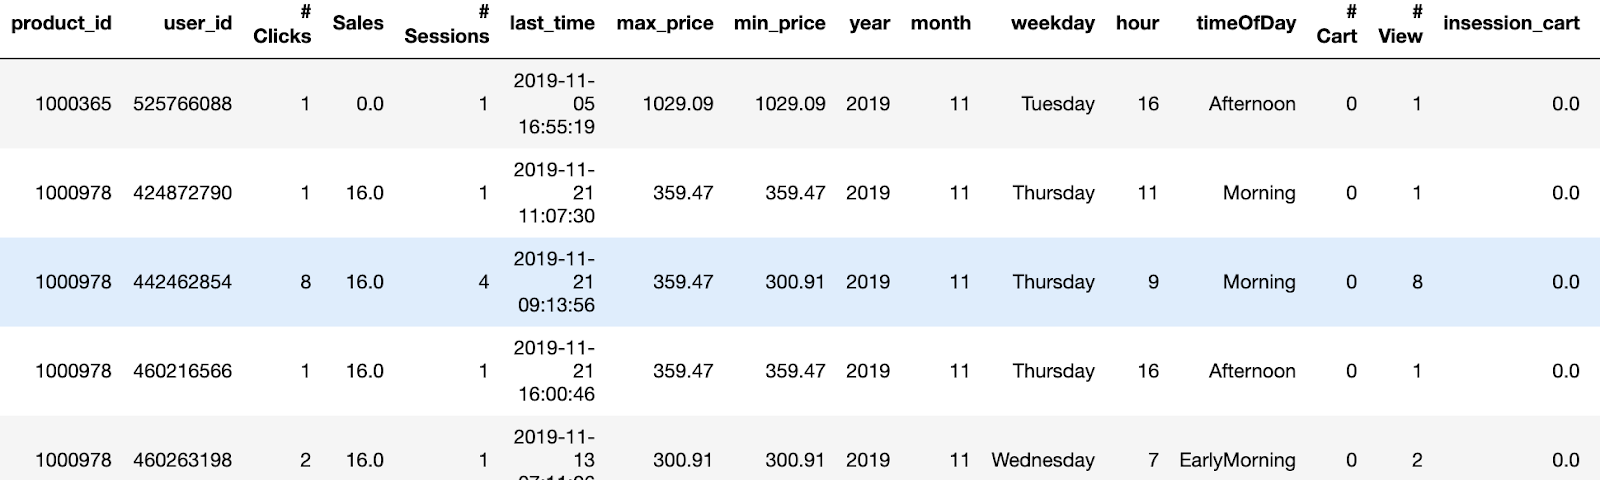

In [ ]:
# change path to wherever you uploaded/downloaded the file
filename= '/content/drive/My Drive/FourthBrain/Assignments/Week_2/image10.png'
display(Image(filename=filename))

The dataset we are working with is essentially what we have screenshotted above, but has been anonomized by removing product IDs and user IDs.

3. Use the pandas `read_csv()` and `head()` functions to read in the training data (`X_train.csv`) and look at the first few rows.

    Note the Purchase column has either 0 (not purchased) or 1 (purchased).

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Week_2/X_train.csv')
train_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,2019,11,Sat,Morning,0,0
1,1,1,0.0,92.67,92.67,0,1,0,1,2019,11,Fr,Dawn,0,0
2,1,1,0.0,155.71,155.71,0,1,0,1,2019,11,Thu,Afternoon,0,0
3,1,1,0.0,898.32,898.32,0,1,0,1,2019,11,Mon,Noon,0,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2019,11,Tue,Noon,0,0


4. Similarly, read in the test data (`X_test.csv`) and look at the first few rows.

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/FourthBrain/Assignments/Week_2/X_test.csv')
test_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase
0,1,1,0.0,126.86,126.86,0,1,0,1,2019,11,Wed,EarlyMorning,0,0
1,2,2,182.0,118.38,118.38,0,2,0,1,2019,11,Fr,EarlyMorning,0,0
2,1,1,0.0,63.77,63.77,0,1,0,1,2019,11,Fr,Morning,0,0
3,1,1,0.0,32.18,32.18,0,1,0,3,2019,11,Fr,EarlyMorning,0,0
4,1,1,0.0,1093.72,1093.72,0,1,0,2,2019,11,Sat,EarlyMorning,0,0


## Task 2: Understand the Data

*Our goal in this assignment is to predict whether a customer/product pair will result in a purchase. As part of this, we will want to identify what features are most important for making this classification.*

We'll start with digging into our dataset.

1. For the training data, print out the datatype of each feature (column), and identify which ones are non-numeric

In [ ]:
train_df.dtypes

NumOfEventsInJourney      int64
NumSessions               int64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                   int64
NumView                   int64
InsessionCart             int64
InsessionView             int64
year                      int64
month                     int64
weekday                  object
timeOfDay                object
Weekend                   int64
Purchase                  int64
dtype: object

2. Print the unique values for the year, month and weekend features.

In [ ]:
import numpy as np

print(np.unique(train_df[['year','month', 'Weekend']].values))

[   0   11 2019]


3. Since these columns each only have one unique value, they will not be valuable features, so drop the three columns in both the training set and the test set.

    Make sure to use `inplace=True` to modify the DataFrame.
    
    Print the shape of the DataFrames to verify the columns were dropped.

In [ ]:
train_df.drop(columns=['year', 'month', 'Weekend'], inplace=True)
test_df.drop(columns=['year', 'month', 'Weekend'], inplace=True)
print('DF Train Shape: ', train_df.shape)
print('DF Test Shape: ', test_df.shape)

DF Train Shape:  (645816, 12)
DF Test Shape:  (430544, 12)


4. For each non-numeric feature, print the unique values.

In [ ]:
import numpy as np

print(np.unique(train_df[['weekday','timeOfDay']].values))

['Afternoon' 'Dawn' 'EarlyMorning' 'Evening' 'Fr' 'Mon' 'Morning' 'Night'
 'Noon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']


5. Convert the non-numeric features to numeric. These feature values are ordered temporally, so this makes some sense to do.

    Follow the example given for the weekday column to update the dayOfWeek column.
    
    Use the `.head()` method to inspect the dataset after the transformations.

In [ ]:
weekday_strings = ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']
weekday_ints = [1, 2, 3, 4, 5, 6, 7]
train_df['weekday'] = train_df['weekday'].replace(weekday_strings, weekday_ints)
train_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,6,Morning,0
1,1,1,0.0,92.67,92.67,0,1,0,1,5,Dawn,0
2,1,1,0.0,155.71,155.71,0,1,0,1,4,Afternoon,0
3,1,1,0.0,898.32,898.32,0,1,0,1,1,Noon,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2,Noon,0


In [ ]:
train_df['timeOfDay'].unique()

array(['Morning', 'Dawn', 'Afternoon', 'Noon', 'Evening', 'EarlyMorning',
       'Night'], dtype=object)

In [ ]:
time_day_strings = ['EarlyMorning', 'Dawn', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night']
time_day_ints = [1, 2, 3, 4, 5, 6, 7]
train_df['timeOfDay'] = train_df['timeOfDay'].replace(time_day_strings, time_day_ints)
train_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,154.41,154.41,0,1,0,1,6,3,0
1,1,1,0.0,92.67,92.67,0,1,0,1,5,2,0
2,1,1,0.0,155.71,155.71,0,1,0,1,4,5,0
3,1,1,0.0,898.32,898.32,0,1,0,1,1,4,0
4,1,1,0.0,146.21,146.21,0,1,0,1,2,4,0


6. Do the same conversions for the test set.

    Make sure to inspect the dataset to make sure it look as expected.

In [ ]:
weekday_strings = ['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']
weekday_ints = [1, 2, 3, 4, 5, 6, 7]
test_df['weekday'] = test_df['weekday'].replace(weekday_strings, weekday_ints)

time_day_strings = ['EarlyMorning', 'Dawn', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night']
time_day_ints = [1, 2, 3, 4, 5, 6, 7]
test_df['timeOfDay'] = test_df['timeOfDay'].replace(time_day_strings, time_day_ints)

test_df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,weekday,timeOfDay,Purchase
0,1,1,0.0,126.86,126.86,0,1,0,1,3,1,0
1,2,2,182.0,118.38,118.38,0,2,0,1,5,1,0
2,1,1,0.0,63.77,63.77,0,1,0,1,5,3,0
3,1,1,0.0,32.18,32.18,0,1,0,3,5,1,0
4,1,1,0.0,1093.72,1093.72,0,1,0,2,6,1,0


7. Use the `Purchase` columns of train and test datasets to determine the proportion of user journeys which result in purchases, in both the training and test datasets.

    Are the datasets balanced?

In [ ]:
#train_df['Purchase'].value_counts(normalize=True)
print('Proportion of Journeys Which Resulted in Purchases in the Training Data: ', round(train_df['Purchase'].mean() * 100, 1))
print('Proportion of Journeys Which Resulted in Purchases in the Test Data: ', round(test_df['Purchase'].mean() * 100, 1))

Proportion of Journeys Which Resulted in Purchases in the Training Data:  1.4
Proportion of Journeys Which Resulted in Purchases in the Test Data:  1.4


The datasets are not balanced, as the minority class in the target variable represents less than 2% of the population.

## Task 3: Reduce the number of features

1. How many features does our dataset currently have?

In [ ]:
print('Number of features in the dataset: ', train_df.shape[1])

Number of features in the dataset:  12


2. Draw a heatmap of the Pearson correlation.

    The plotting code is given to you, but you need to fill in the calculation of the Pearson correlation.

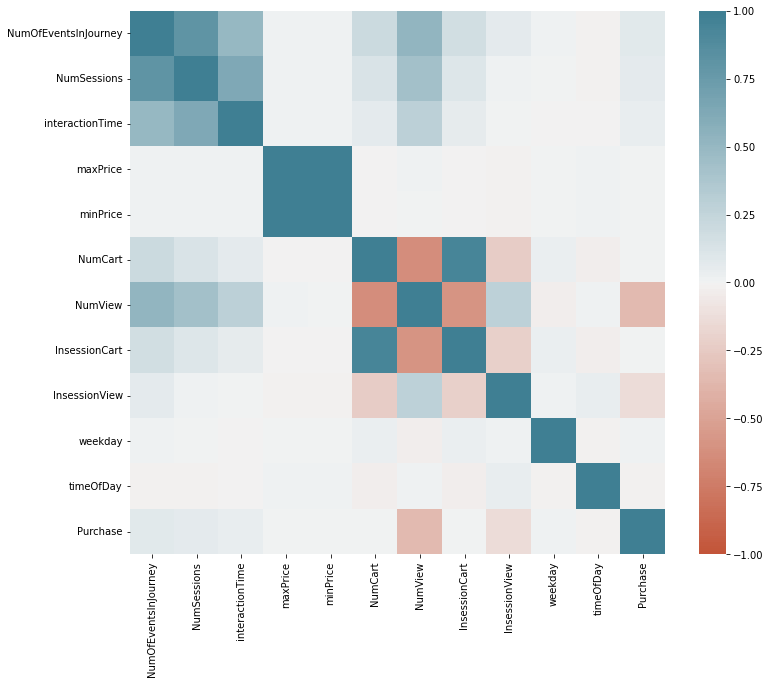

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
cor = train_df.corr()
sns.heatmap(cor, vmin=-1, center=0, vmax=1, cmap=sns.diverging_palette(20, 220, n=200),);

3. Drop the features with high correlation.

    We'll do this by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair.

    Store the remaining set of features (the ones you didn't drop) in dataframes `train_df_reduced`.

In [ ]:
import numpy as np

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_df, 10))

Top Absolute Correlations
maxPrice              minPrice           0.999926
NumCart               InsessionCart      0.939642
NumOfEventsInJourney  NumSessions        0.804761
NumSessions           interactionTime    0.631909
NumCart               NumView            0.627781
NumView               InsessionCart      0.599617
NumOfEventsInJourney  NumView            0.517604
                      interactionTime    0.504920
NumSessions           NumView            0.436709
NumView               Purchase           0.359205
dtype: float64


In [ ]:
train_df_reduced = train_df.drop(columns=['minPrice', 'InsessionCart', 'NumSessions'])

5. How many columns are left in the DataFrame?

In [ ]:
print('Number of Columns Left in Train Data: ', train_df_reduced.shape[1])

Number of Columns Left in Train Data:  9


5. Remove the same features from the test set and save in a new dataframe `test_df_reduced`.

In [ ]:
test_df_reduced = test_df.drop(columns=['minPrice', 'InsessionCart', 'NumSessions'])
print('Number of Columns Left in Test Data: ', test_df_reduced.shape[1])

Number of Columns Left in Test Data:  9


6. Visualize the selected features. (Ignore the warning messages about distplot.)
    
    If you have time, experiment with some other visualizations of the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

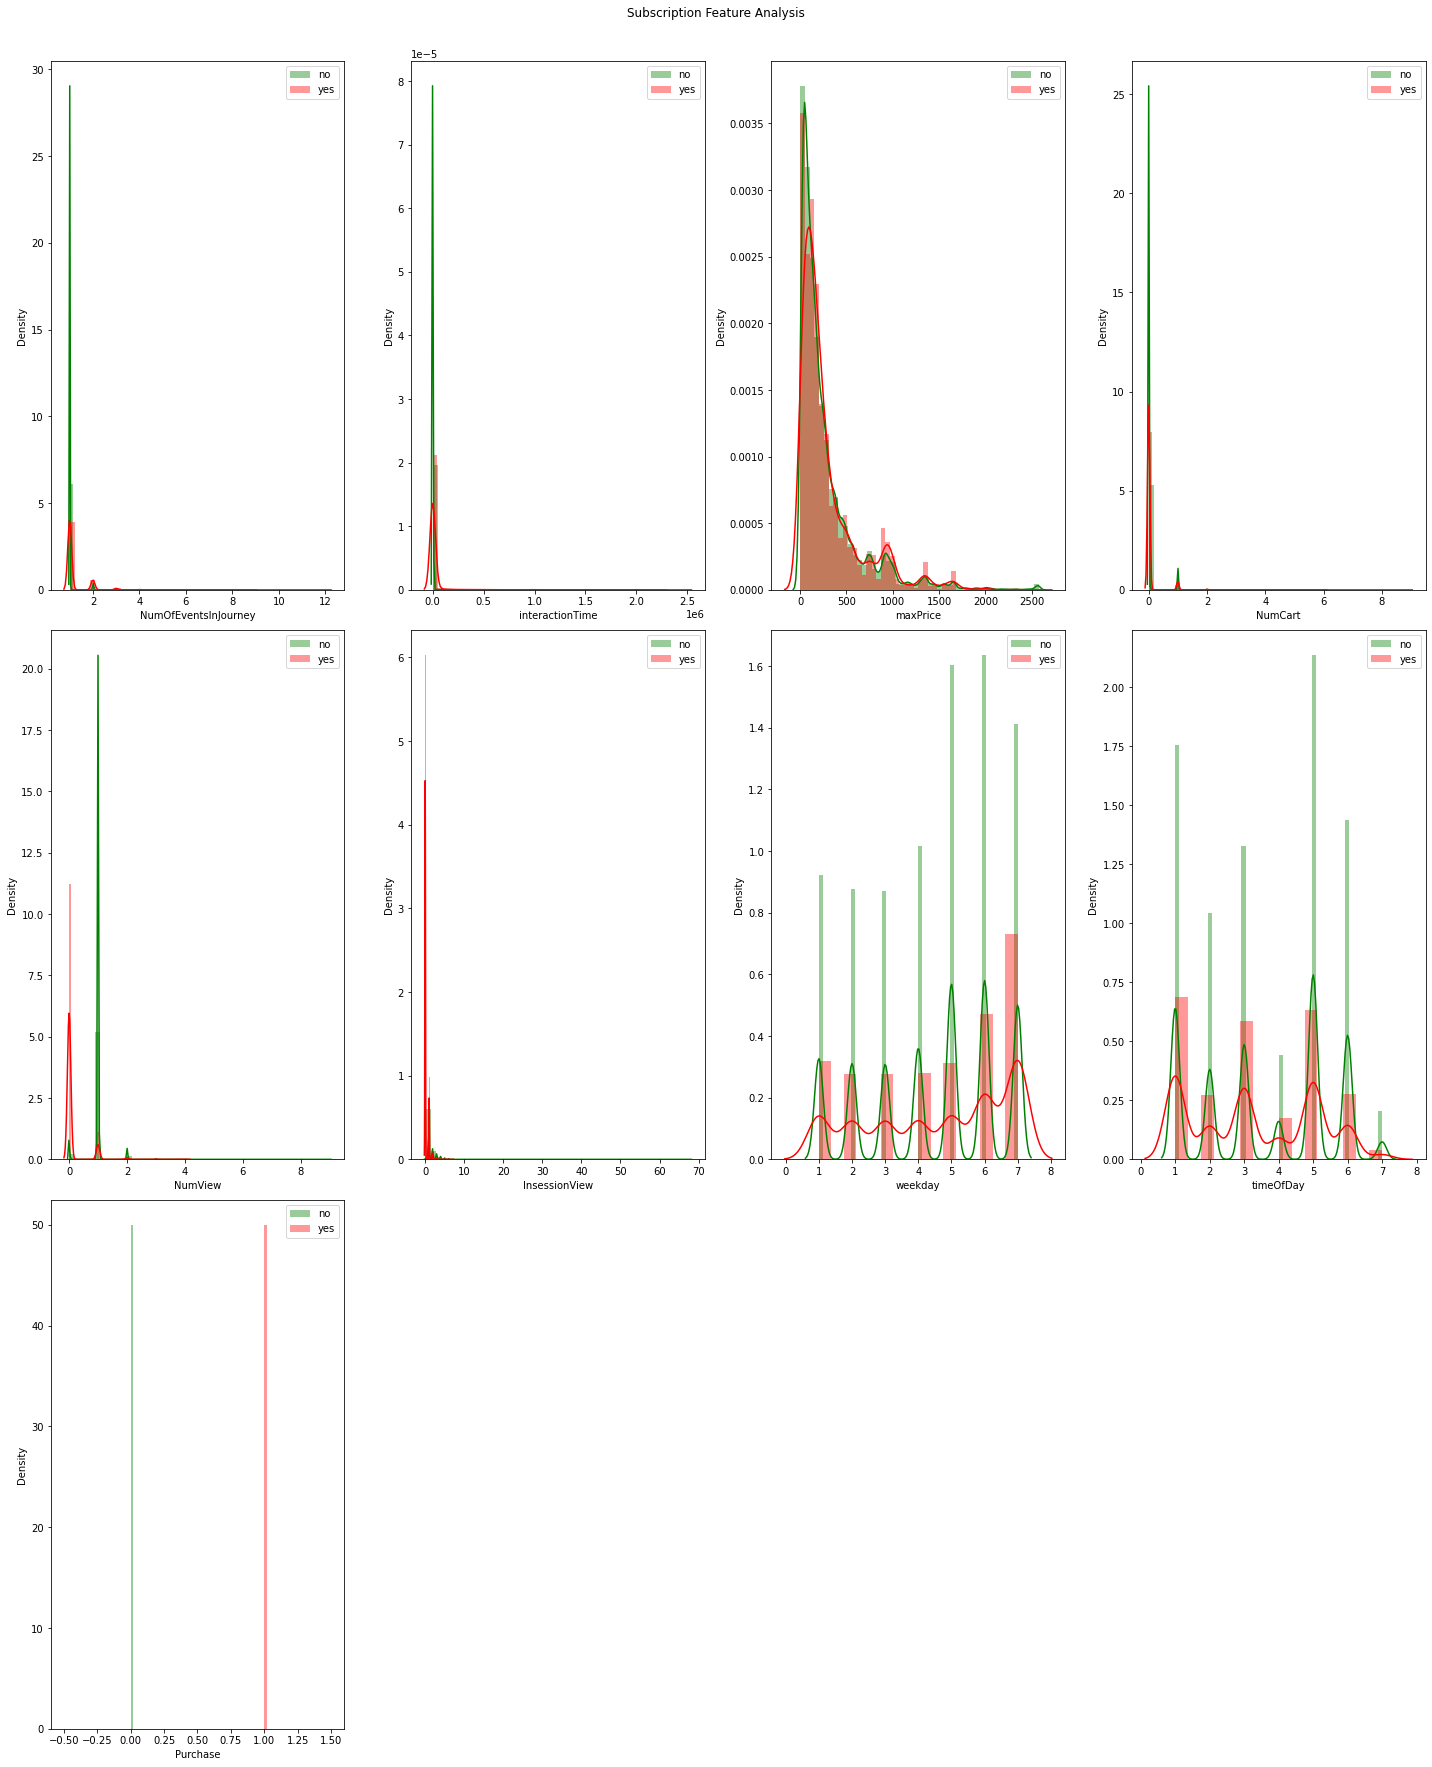

In [ ]:
fig = plt.figure(figsize=(20, 25))
j = 0
for i in train_df_reduced.columns:
    plt.subplot(3, 4, j + 1)
    j += 1
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 0], color='g', label='no')
    sns.distplot(train_df_reduced[i][train_df_reduced['Purchase'] == 1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

7. Make the NumPy arrays `X_train_reduced`, `X_test_reduced`, `y_train` and `y_test` from `train_df_reduced` and `test_df_reduced`. 

In [ ]:
X_train_reduced = train_df_reduced.iloc[:, :-1].values
y_train = train_df_reduced.iloc[:, -1].values

X_test_reduced = test_df_reduced.iloc[:, :-1].values
y_test = test_df_reduced.iloc[:, -1].values

print('X_train shape: ', X_train_reduced.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (645816, 8)
y_train shape:  (645816,)


8. Scale the features in `X_train_reduced` and `X_test_reduced` so that the max norm of each feature is 1.

In [ ]:
from sklearn.preprocessing import normalize  # you can use this module, (but you don't have to)

X_train_reduced = normalize(X_train_reduced, norm='max', axis=0)
X_test_reduced = normalize(X_test_reduced, norm='max', axis=0)

In the cell below we show you how to use a Random Forest to rank features based on a measure of importance called the Gini Importance. We'll provide you with all the code, but you may want to read up on sklearn's [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) and its [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier.feature_importances_) property.

9. Look at the results below to note the most important features.

Feature ranking:
1. NumCart (feature 3) (0.550673)
2. NumView (feature 4) (0.353472)
3. InsessionView (feature 5) (0.040461)
4. NumOfEventsInJourney (feature 0) (0.029200)
5. interactionTime (feature 1) (0.010497)
6. weekday (feature 6) (0.007075)
7. maxPrice (feature 2) (0.005610)
8. timeOfDay (feature 7) (0.003013)


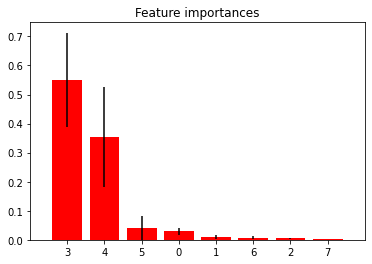

In [ ]:
# Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train_reduced, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_reduced.shape[1]):
    print("%d. %s (feature %d) (%f)" %
          (f + 1, train_df_reduced.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_reduced.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]]);

Thus features 3 and 4 (numcart, numview) are the top two most important features (according to the Random Forest model). We'll use these two features, along with interaction time (feature 1) for visualization of the data, but we'll fit classification models using all 6 of the features. Let's set up a convenient function for the visualization with the numcart and numview features.

In [ ]:
# This function visualizes the classification output on a scatter plot,
# indicating the 4 types of outputs in a confusion matrix 
# (True Positive, True Negative, False Negative, False Positive)
from mpl_toolkits import mplot3d
def visualize_scatter_plot(X, y, yhat, title):
    loc11 = np.where((y > 0) & (yhat > 0), 1, 0) #TP
    loc00 = np.where((y == 0) & (yhat == 0), 1, 0) #TN
    loc10 = np.where((y > 0) & (yhat == 0), 1, 0) #FN
    loc01 = np.where((y == 0) & (yhat > 0), 1, 0) #FP
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    ax.scatter3D(
        X[np.where(loc00 > 0), 3],
        X[np.where(loc00 > 0), 4],
        X[np.where(loc00 > 0), 1],
        color='blue',
        marker='o')
    ax.scatter3D(
        X[np.where(loc10 > 0), 3],
        X[np.where(loc10 > 0), 4],
        X[np.where(loc10 > 0), 1],
        color='cyan',
        marker='o')
    ax.scatter3D(
        X[np.where(loc11 > 0), 3],
        X[np.where(loc11 > 0), 4],
        X[np.where(loc11 > 0), 1],
        color='orange',
        marker='^')
    ax.scatter3D(
        X[np.where(loc01 > 0), 3],
        X[np.where(loc01 > 0), 4],
        X[np.where(loc01 > 0), 1],
        color='green',
        marker='^')
    ax.set_xlabel('NumCart')
    ax.set_ylabel('NumViews')
    ax.set_zlabel('InteractionTime')
    plt.title(title)
    plt.show()

## Task 4: Build Logistic Regression and SVM models

We will be fitting both a Logistic Regression and SVM model to the reduced features and then looking at classification metrics such as Accuracy, Precision, Recall, and F1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

1. Instantiate, train, and predict with the Logistic Regression model.

    Make sure to account for the imbalanced classes with with `class_weight` parameter.

    Remember to use the ***train*** data for building the model and the ***test*** data when making and evaluating the predictions

In [ ]:
lreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=9).fit(X_train_reduced, y_train)
y_pred = lreg.predict(X_test_reduced)

2. Calculate these classification metrics for the Logistic Regression model:

    * accuracy
    * precision
    * recall
    * f1 score
    * confusion matrix

In [ ]:
print('Accuracy: ', accuracy(y_pred, y_test))
print('Precision: ', precision(y_pred, y_test))
print('Recall: ', recall(y_pred, y_test))
print('F1 Score: ', f1_score(y_pred, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred, y_test))

Accuracy:  0.9991057824519678
Precision:  0.9893790849673203
Recall:  0.9498039215686275
F1 Score:  0.9691876750700281
Confusion Matrix:  [[424104     65]
 [   320   6055]]


3. Use the `visualize_scatter_plot()` function to visualize the performance of the Logistic Regression model.

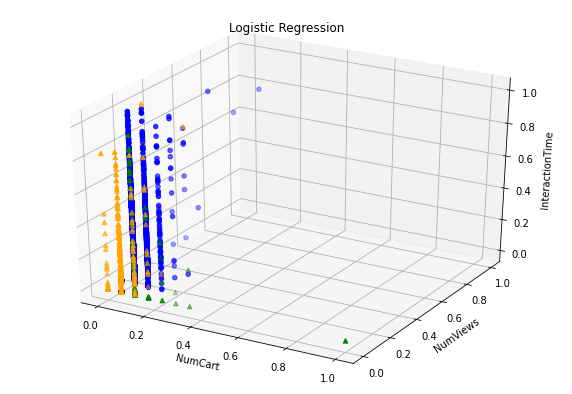

In [ ]:
title = 'Logistic Regression'
visualize_scatter_plot(X_test_reduced, y_test, y_pred, title)

4. Instantiate, train and predict with the SVM mode.

    Again, remember to account fo the imbalanced classes.

In [ ]:
lsvc = LinearSVC(class_weight='balanced', max_iter=10000, random_state=9).fit(X_train_reduced, y_train)
y_pred_svc = lsvc.predict(X_test_reduced)

5. Calculate the classification metrics for the SVM model.

In [ ]:
print('Accuracy: ', accuracy(y_pred_svc, y_test))
print('Precision: ', precision(y_pred_svc, y_test))
print('Recall: ', recall(y_pred_svc, y_test))
print('F1 Score: ', f1_score(y_pred_svc, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred_svc, y_test))

Accuracy:  0.9997932847746107
Precision:  0.9901960784313726
Recall:  0.9952373131877156
F1 Score:  0.9927102956835121
Confusion Matrix:  [[424395     60]
 [    29   6060]]


6. Use the `visualize_scatter_plot()` function to visualize the performance of the SVM model.

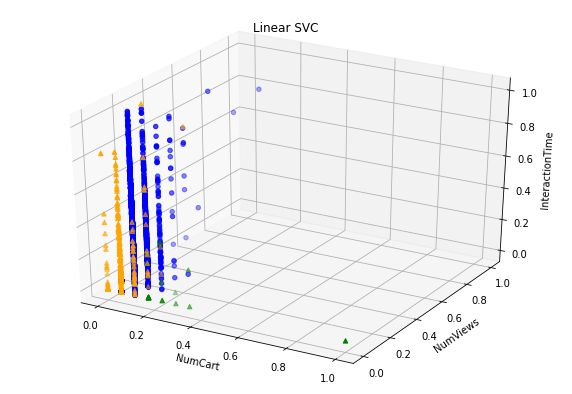

In [ ]:
title = 'Linear SVC'
visualize_scatter_plot(X_test_reduced, y_test, y_pred_svc, title)

## Task 5: Fit a Non-Linear Classifier, the Gradient Boosted Tree.

1. Instantiate, train, and predict with the Gradient Boosted Trees model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=9).fit(X_train_reduced, y_train)
y_pred_gbc = gbc.predict(X_test_reduced)

2. Evaluate the model by calculating the classification metrics.

In [ ]:
print('Accuracy: ', accuracy(y_pred_gbc, y_test))
print('Precision: ', precision(y_pred_gbc, y_test))
print('Recall: ', recall(y_pred_gbc, y_test))
print('F1 Score: ', f1_score(y_pred_gbc, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred_gbc, y_test))

Accuracy:  0.9990802333791668
Precision:  0.9823529411764705
Recall:  0.9542857142857143
F1 Score:  0.9681159420289855
Confusion Matrix:  [[424136    108]
 [   288   6012]]


3. Visualize the performance with the `visualize_scatter_plot()` function.

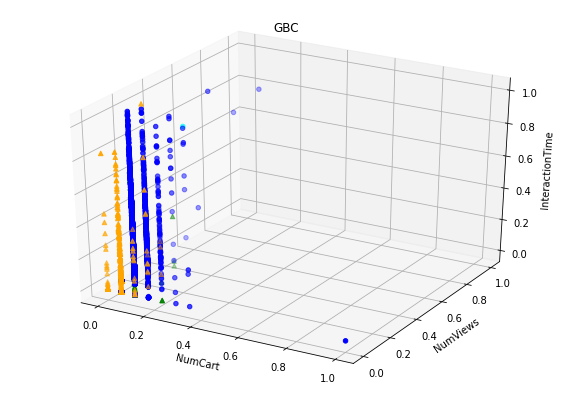

In [ ]:
title = 'GBC'
visualize_scatter_plot(X_test_reduced, y_test, y_pred_gbc, title)

## Task 6: Analyze importace of data sample balancing using a Random Forest

1. Instantiate, train, predict with, and evaluate an unbalanced random forest classifier. (Follow the same steps you did above with the other models)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=9).fit(X_train_reduced, y_train)
y_pred_rf = rf.predict(X_test_reduced)
print('Accuracy: ', accuracy(y_pred_rf, y_test))
print('Precision: ', precision(y_pred_rf, y_test))
print('Recall: ', recall(y_pred_rf, y_test))
print('F1 Score: ', f1_score(y_pred_rf, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred_rf, y_test))

Accuracy:  0.9984461518451075
Precision:  0.9258169934640523
Recall:  0.9634415915660602
F1 Score:  0.9442546454462127
Confusion Matrix:  [[424209    454]
 [   215   5666]]


2. Repeat the previous exercise, but this time, incorporate class-balanced penalty weights

In [ ]:
rfw = RandomForestClassifier(class_weight='balanced', random_state=9).fit(X_train_reduced, y_train)
y_pred_rfw = rfw.predict(X_test_reduced)
print('Accuracy: ', accuracy(y_pred_rfw, y_test))
print('Precision: ', precision(y_pred_rfw, y_test))
print('Recall: ', recall(y_pred_rfw, y_test))
print('F1 Score: ', f1_score(y_pred_rfw, y_test))
print('Confusion Matrix: ', confusion_matrix(y_pred_rfw, y_test))

Accuracy:  0.9990941692370582
Precision:  0.9725490196078431
Recall:  0.9640427599611273
F1 Score:  0.9682772083943387
Confusion Matrix:  [[424202    168]
 [   222   5952]]


3. Visualize a Decision Tree. Spend some time inspecting this visualization of the tree--what does each line in the boxes mean? Discuss this with your partners. What does the "value=..." line indicate?

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(rfw.estimators_[0], max_depth=5, out_file='tree.dot', 
                feature_names = test_df_reduced.iloc[:, :-1].columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

The "value=..." line indicates the number of observations per class.